In [61]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

from pmdarima.arima import auto_arima

In [43]:
# Import data
sales_data = pd.read_csv(r'C:\Users\i37307\OneDrive - Verisk Analytics\data\Champagne sales dataset\champers_sales.csv')
# Change to datetime format
sales_data['Month'] = pd.to_datetime(sales_data['Month'])
# Set index to 'Month'
sales_data.set_index('Month', inplace=True)
# View data
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<AxesSubplot:xlabel='Month'>

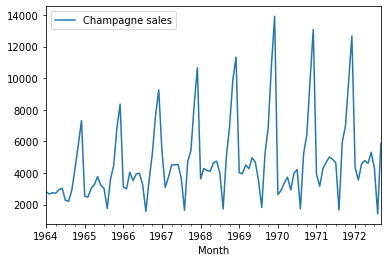

In [44]:
sales_data.plot()

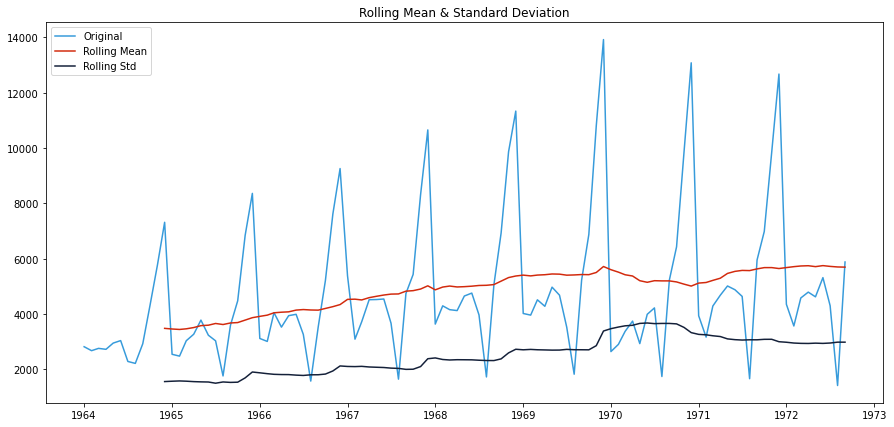

In [54]:
#Determine rolling statistics
sales_data["rolling_avg"] = sales_data["Champagne sales"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
sales_data["rolling_std"] = sales_data["Champagne sales"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(sales_data["Champagne sales"], color='#379BDB', label='Original')
plt.plot(sales_data["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(sales_data["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [63]:
from statsmodels.tsa.stattools import adfuller
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(sales_data['Champagne sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

sig = 0.05
print(np.where(dftest[1]>sig, "Non-stationary", "Stationary"))

Results of Dickey Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64
Non-stationary


In [59]:
dftest[1]

0.3639157716602417

In [45]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(sales_data)

(0.01, False)

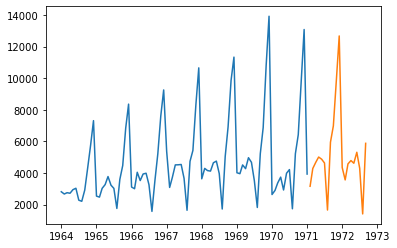

In [46]:
from matplotlib import pyplot as plt


split = 85
train = sales_data[:split]
test = sales_data[split:]
plt.plot(train)
plt.plot(test)

In [47]:
min = 0
max = 10
arima_model = auto_arima(train, 
                        start_P=min,
                        d=1,
                        start_q=min,
                        D=1,
                        start_Q=min,
                        max_P=max,
                        max_D=max,
                        max_Q=max,
                        m=12,
                        seasonal=True,
                        error_action='warn',
                        trace=True,
                        suppress_warnings=True,
                        stepwise=True,
                        random_state=20,
                        n_fits=500)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1187.500, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.20 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.13 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.04 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.32 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.859, Time=1.09 sec
 ARIMA(2,1,2)(0,1,0)[12]     

In [48]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Tue, 23 Aug 2022   AIC                           1174.564
Time:                                     13:38:36   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
arima_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [50]:
prediction = pd.DataFrame(arima_model.predict(n_periods=20), index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.681725
1971-03-01,3247.944567
1971-04-01,3592.488523
1971-05-01,2800.901257
1971-06-01,3841.889614
1971-07-01,4088.040378
1971-08-01,1596.296086
1971-09-01,5090.016138
1971-10-01,6283.998805


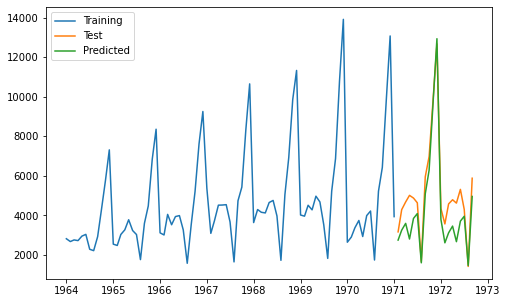

In [51]:
plt.figure(figsize=(8,5))
plt.plot(train, label="Training")
plt.plot(test, label="Test")
plt.plot(prediction, label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
test['predicted_sales'] = prediction

perf_dict = {
    'r2': r2_score(test['Champagne sales'], test['predicted_sales']),
    'mae': mean_absolute_error(test['Champagne sales'], test['predicted_sales']),
    'mse': mean_squared_error(test['Champagne sales'], test['predicted_sales']),
    'mape': mean_absolute_percentage_error(test['Champagne sales'], test['predicted_sales'])
}
perf_dict

c:\Users\i37307\Anaconda3\envs\tsaienv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'r2': 0.811477383636726,
 'mae': 876.1896598966862,
 'mse': 1124104.3022890012,
 'mape': 0.1840367483646662}